## Ordered Integer Encoding

Ordering the categories according to the target means assigning a number to the category from 1 to k, where k is the number of distinct categories in the variable, but this numbering is informed by the mean of the target for each category.

For example, we have the variable city with values London, Manchester and Bristol; if the default rate is 30% in London, 20% in Bristol and 10% in Manchester, then we replace London by 1, Bristol by 2 and Manchester by 3.

## In this demo:

We will see how to perform one hot encoding with Feature-Engine using the House Prices dataset.

For guidelines to obtain the dataset, visit **section 2** of the course.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# for encoding with feature-engine
from feature_engine.encoding import OrdinalEncoder

In [2]:
# load dataset

data = pd.read_csv(
    "../../houseprice.csv",
    usecols=["Neighborhood", "Exterior1st", "Exterior2nd", "SalePrice"],
)

data.head()

Neighborhood Exterior1st Exterior2nd  SalePrice
0      CollgCr     VinylSd     VinylSd     208500
1      Veenker     MetalSd     MetalSd     181500
2      CollgCr     VinylSd     VinylSd     223500
3      Crawfor     Wd Sdng     Wd Shng     140000
4      NoRidge     VinylSd     VinylSd     250000

In [3]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ": ", len(data[col].unique()), " labels")

Neighborhood :  25  labels
Exterior1st :  15  labels
Exterior2nd :  16  labels
SalePrice :  663  labels


In [4]:
# let's explore the unique categories
data["Neighborhood"].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [5]:
data["Exterior1st"].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [6]:
data["Exterior2nd"].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

### Encoding important

We select which digit to assign each category using the train set, and then use those mappings in the test set.

In [7]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[["Neighborhood", "Exterior1st", "Exterior2nd"]],  # predictors
    data["SalePrice"],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0,
)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1022, 3), (438, 3))

### Explore original relationship between categorical variables and target

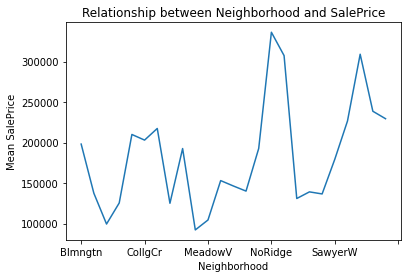

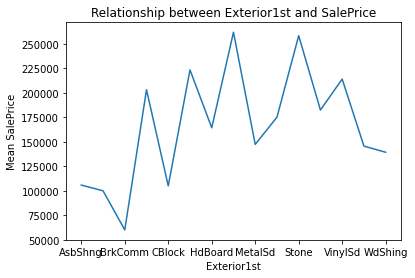

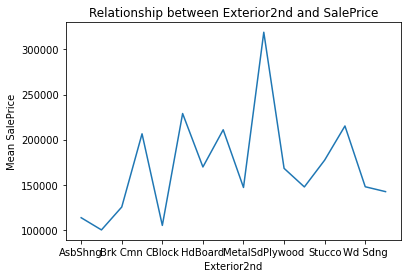

In [8]:
# let's explore the relationship of the categories with the target

for var in ["Neighborhood", "Exterior1st", "Exterior2nd"]:

    fig = plt.figure()
    fig = y_train.groupby(X_train[var]).mean().plot()
    fig.set_title("Relationship between {} and SalePrice".format(var))
    fig.set_ylabel("Mean SalePrice")
    plt.show()

In [9]:
ordinal_enc = OrdinalEncoder(
    # NOTE that we indicate ordered in the encoding_method, otherwise it assings numbers arbitrarily
    encoding_method="ordered",
    variables=["Neighborhood", "Exterior1st", "Exterior2nd"],
)

In [10]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

ordinal_enc.fit(X_train, y_train)

OrdinalEncoder(variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

In [11]:
# in the encoder dict we can observe each of the top categories
# selected for each of the variables

ordinal_enc.encoder_dict_

{'Neighborhood': {'IDOTRR': 0,
  'BrDale': 1,
  'MeadowV': 2,
  'Edwards': 3,
  'BrkSide': 4,
  'OldTown': 5,
  'Sawyer': 6,
  'Blueste': 7,
  'SWISU': 8,
  'NPkVill': 9,
  'NAmes': 10,
  'Mitchel': 11,
  'SawyerW': 12,
  'Gilbert': 13,
  'NWAmes': 14,
  'Blmngtn': 15,
  'CollgCr': 16,
  'ClearCr': 17,
  'Crawfor': 18,
  'Somerst': 19,
  'Veenker': 20,
  'Timber': 21,
  'NridgHt': 22,
  'StoneBr': 23,
  'NoRidge': 24},
 'Exterior1st': {'BrkComm': 0,
  'AsphShn': 1,
  'CBlock': 2,
  'AsbShng': 3,
  'WdShing': 4,
  'Wd Sdng': 5,
  'MetalSd': 6,
  'HdBoard': 7,
  'Plywood': 8,
  'Stucco': 9,
  'BrkFace': 10,
  'VinylSd': 11,
  'CemntBd': 12,
  'Stone': 13,
  'ImStucc': 14},
 'Exterior2nd': {'AsphShn': 0,
  'CBlock': 1,
  'AsbShng': 2,
  'Brk Cmn': 3,
  'Wd Shng': 4,
  'MetalSd': 5,
  'Stone': 6,
  'Wd Sdng': 7,
  'Plywood': 8,
  'HdBoard': 9,
  'Stucco': 10,
  'BrkFace': 11,
  'ImStucc': 12,
  'VinylSd': 13,
  'CmentBd': 14,
  'Other': 15}}

In [12]:
# this is the list of variables that the encoder will transform

ordinal_enc.variables_

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [13]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

# let's explore the result
X_train.head()

Neighborhood  Exterior1st  Exterior2nd
64              16           11           13
682             17            5            7
960              4            5            8
1384             3            4            4
1100             8            5            7

**Note**

If the argument `variables` is left to None, then the encoder will automatically identify all categorical variables. Is that not sweet?

The encoder will not encode numerical variables. So if some of your numerical variables are in fact categories, you will need to re-cast them as object before using the encoder.

Finally, if there is a label in the test set that was not present in the train set, the encoder will through and error, to alert you of this behaviour.

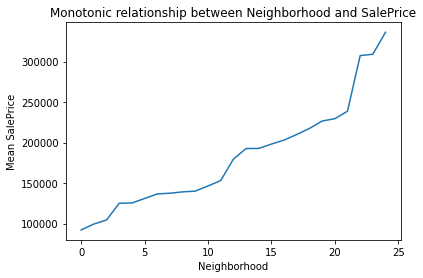

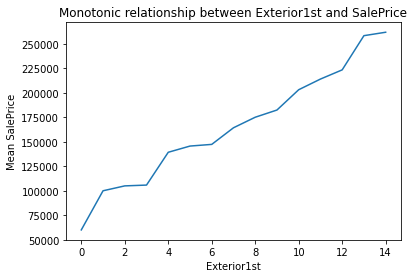

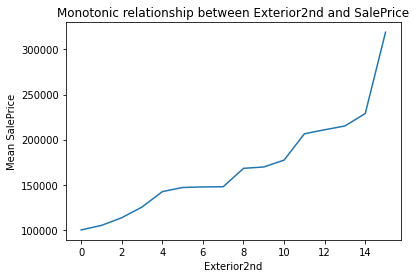

In [14]:
# let's inspect the newly created monotonic relationship
# between the variables and the target

for var in ["Neighborhood", "Exterior1st", "Exterior2nd"]:

    fig = plt.figure()
    fig = y_train.groupby(X_train[var]).mean().plot()
    fig.set_title("Monotonic relationship between {} and SalePrice".format(var))
    fig.set_ylabel("Mean SalePrice")
    plt.show()

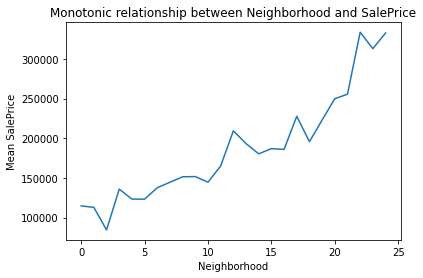

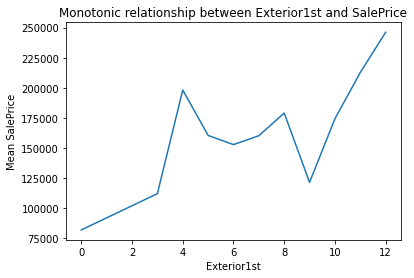

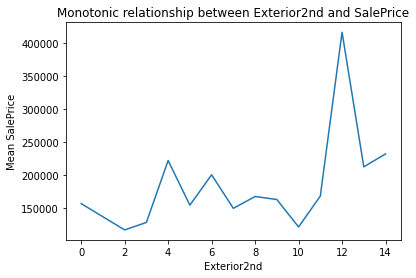

In [15]:
# let's inspect the newly created monotonic relationship
# between the variables and the target

for var in ["Neighborhood", "Exterior1st", "Exterior2nd"]:

    fig = plt.figure()
    fig = y_test.groupby(X_test[var]).mean().plot()
    fig.set_title("Monotonic relationship between {} and SalePrice".format(var))
    fig.set_ylabel("Mean SalePrice")
    plt.show()